<a href="https://colab.research.google.com/github/Romain-MARRION/Portfolio/blob/main/final_porjetct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPool2D, Flatten, Dense, Dropout,BatchNormalization

In [132]:
SEED=42

In [133]:
train_dataset, validation_dataset , test_dataset = tfds.load(
    'ColorectalHistology', 
    shuffle_files=True,
    read_config = tfds.ReadConfig(shuffle_seed=SEED),
    as_supervised=True,
    split=['train[:60%]', 'train[60%:80%]', 'train[80%:]'])

all the same lenght and values between 0 and 255

In [134]:
for element in train_dataset.take(3):
    print(element)

(<tf.Tensor: shape=(150, 150, 3), dtype=uint8, numpy=
array([[[238, 211, 226],
        [232, 205, 220],
        [233, 210, 230],
        ...,
        [242, 242, 240],
        [242, 241, 239],
        [244, 243, 241]],

       [[225, 213, 223],
        [223, 211, 221],
        [225, 208, 216],
        ...,
        [243, 242, 240],
        [243, 242, 240],
        [244, 243, 241]],

       [[225, 209, 222],
        [228, 212, 225],
        [230, 214, 224],
        ...,
        [243, 242, 240],
        [243, 242, 240],
        [244, 243, 241]],

       ...,

       [[239, 243, 244],
        [239, 243, 244],
        [239, 243, 244],
        ...,
        [241, 241, 241],
        [240, 242, 241],
        [240, 242, 241]],

       [[239, 243, 244],
        [239, 243, 244],
        [239, 243, 244],
        ...,
        [241, 241, 241],
        [240, 242, 241],
        [240, 242, 241]],

       [[239, 243, 244],
        [239, 243, 244],
        [239, 243, 244],
        ...,
        [241, 241, 2

In [135]:
BUFFER_SIZE = 1000
BATCH_SIZE = 32
num_classes=8

In [136]:
train_dataset = train_dataset.cache().shuffle(BUFFER_SIZE)\
    .batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)\
    .prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE)\
    .prefetch(buffer_size=tf.data.AUTOTUNE)

In [137]:
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [138]:
image_batch, label_batch = next(iter(train_dataset))
image_batch.shape, label_batch.shape


(TensorShape([32, 150, 150, 3]), TensorShape([32]))

In [139]:
model=Sequential(
    [
        Convolution2D(128, (3 ,3), input_shape=(150, 150, 3),padding='same', activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        BatchNormalization(),
        Convolution2D(64, (3 ,3),padding='same', activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Convolution2D(64, (3 ,3),padding='same', activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Convolution2D(64, (3 ,3),padding='same', activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.4),
        Convolution2D(64, (3 ,3),padding='same', activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.4),
        Flatten(),
        Dense(128,activation='relu'),
        Dropout(0.4),
        Dense(activation='softmax', units=num_classes)
    ]
)

In [140]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 75, 75, 128)      0         
 g2D)                                                            
                                                                 
 batch_normalization_9 (Batc  (None, 75, 75, 128)      512       
 hNormalization)                                                 
                                                                 
 conv2d_62 (Conv2D)          (None, 75, 75, 64)        73792     
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                     

In [141]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=1000,
    decay_rate=0.9)

In [153]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4), loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

In [154]:
history =model.fit(train_dataset, epochs=40, validation_data=validation_dataset)

Epoch 1/40
94/94 [==============================] - 7s 68ms/step - loss: 0.0202 - accuracy: 0.9937 - val_loss: 0.3754 - val_accuracy: 0.9170
Epoch 2/40
94/94 [==============================] - 6s 66ms/step - loss: 0.0233 - accuracy: 0.9947 - val_loss: 0.4985 - val_accuracy: 0.8980
Epoch 3/40
94/94 [==============================] - 6s 67ms/step - loss: 0.0348 - accuracy: 0.9913 - val_loss: 0.5599 - val_accuracy: 0.8900
Epoch 4/40
94/94 [==============================] - 6s 67ms/step - loss: 0.0260 - accuracy: 0.9927 - val_loss: 0.5018 - val_accuracy: 0.9030
Epoch 5/40
94/94 [==============================] - 7s 70ms/step - loss: 0.0337 - accuracy: 0.9920 - val_loss: 0.5051 - val_accuracy: 0.9080
Epoch 6/40
94/94 [==============================] - 6s 67ms/step - loss: 0.0350 - accuracy: 0.9900 - val_loss: 0.4705 - val_accuracy: 0.9080
Epoch 7/40
94/94 [==============================] - 6s 68ms/step - loss: 0.0249 - accuracy: 0.9933 - val_loss: 0.3823 - val_accuracy: 0.9190
Epoch 8/40
94

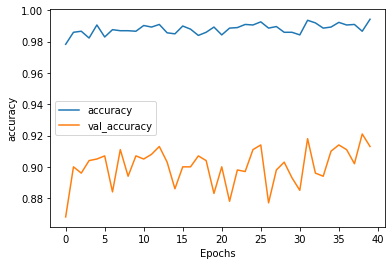

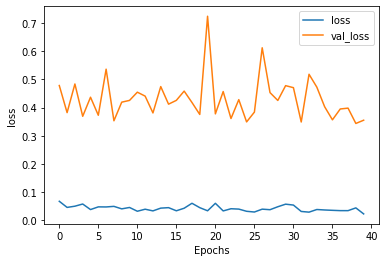

In [152]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")